# Capstone project

## Introduction

Have you ever wonderd what a life with no crimes will feel like ?

The Crime rate have been growing rapidly in the last years, making the work of the police officers much harder. Imagine the time spent to surveillance areas, Investigate crimes and understand the crimnal behaviour. We live in a world where technology solves many of our problems.

In this project I will be helping the Denvur police department in analysing previous crimes with the venues that srounded the areas where they occured. This analysis will assist them in predicting new crimes according to the time and location of previous crimes, and how will the type of venues surrounding crime areas affect thier number. 

The crime analysis will not only help the police officers in understanding the criminal behaviour, it will also help in targating the areas where crimes most probably will occur, saving the time and effort of the police officers.

## Data 

Two datasets will be used in the project:
<ul>
    <li> A dataset from Kaggle that contains historical data of Denvur's city crimes (offense type, offense category, first occurance, incident address, longitude, latitude, Nighborhood) </li>
    <li>Dataset extracted using the Forsquare Api. Using the nighborhood from the crime dataset, a set of venues will be extracted (Arts and Entertainment, Fitness Center, Food, Medical Center, Nightlife Spot ,and Shop and Service)</li>

</ul>

### Data Cleaning

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import folium 
import requests
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import KMeans

In [217]:
cd crime.csv

[WinError 267] The directory name is invalid: 'crime.csv'
C:\Users\mayad\Downloads\crime.csv


In [218]:
Denvur_crimes=pd.read_csv('crime.csv')
Denvur_crimes.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2018869789,2018869789239900,2399,0,theft-other,larceny,12/27/2018 3:58:00 PM,NaN,12/27/2018 4:51:00 PM,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5,512,stapleton,1,0
1,2015664356,2015664356544100,5441,0,traffic-accident,traffic-accident,11/13/2015 7:45:00 AM,NaN,11/13/2015 8:38:00 AM,4100 BLOCK W COLFAX AVE,3129148.0,1694748.0,-105.040760,39.739991,1,122,west-colfax,0,1
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,6/8/2017 1:15:00 PM,6/8/2017 5:15:00 PM,6/12/2017 8:44:00 AM,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6,612,union-station,1,0
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,12/7/2019 1:07:00 PM,12/7/2019 6:30:00 PM,12/9/2019 1:35:00 PM,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1,122,west-colfax,1,0
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 8:15:00 PM,12/22/2018 8:31:00 PM,12/22/2018 10:00:00 PM,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5,521,montbello,1,0


In [219]:
Denvur_crimes.shape

(512656, 19)

In [220]:
Denvur_crimes.describe()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,IS_CRIME,IS_TRAFFIC
count,5.126560e+05,5.126560e+05,512656.000000,512656.000000,5.082010e+05,5.082010e+05,5.082010e+05,508201.000000,512656.000000,512656.000000,512656.000000,512656.000000
mean,4.027695e+09,4.027695e+15,3765.358330,0.204995,3.165227e+06,1.695665e+06,-1.049231e+02,39.717988,3.519483,369.493725,0.748348,0.252220
std,1.320768e+10,1.320768e+16,1653.623964,0.576853,7.236597e+05,1.780277e+05,2.025079e+00,0.766881,1.781151,178.900070,0.433963,0.434287
min,2.015800e+04,2.015854e+10,902.000000,0.000000,1.000000e+00,1.000000e+00,-1.154641e+02,0.000000,1.000000,111.000000,0.000000,0.000000
25%,2.016107e+09,2.016107e+15,2305.000000,0.000000,3.138717e+06,1.683228e+06,-1.050066e+02,39.708002,2.000000,221.000000,0.000000,0.000000
50%,2.017695e+09,2.017695e+15,3532.000000,0.000000,3.145616e+06,1.694794e+06,-1.049822e+02,39.739812,3.000000,323.000000,1.000000,0.000000
75%,2.019498e+09,2.019498e+15,5441.000000,0.000000,3.162378e+06,1.701849e+06,-1.049226e+02,39.759143,5.000000,521.000000,1.000000,1.000000
max,2.020890e+12,2.020890e+18,7399.000000,5.000000,4.067477e+07,1.141836e+07,5.000000e-07,39.904311,7.000000,759.000000,1.000000,1.000000


All rows with is_Crime=0 and is_traffic=1 will be droped as the main concern is crimes and not offenses

In [221]:
index_data=Denvur_crimes[Denvur_crimes["IS_CRIME"]==0].index
Denvur_crimes.drop(index_data, inplace =True)
index_data=Denvur_crimes[Denvur_crimes["IS_TRAFFIC"]==1].index
Denvur_crimes.drop(index_data, inplace =True)

In [222]:
Denvur_crimes.shape

(383354, 19)

Drop the is_crime and is_traffic columns

In [223]:
Denvur_crimes.drop("IS_CRIME",axis=1, inplace =True)
Denvur_crimes.drop("IS_TRAFFIC",axis=1, inplace =True)

In [224]:
Denvur_crimes.shape

(383354, 17)

Drop all columns that will not be needed for analysis

In [225]:
# Denvur_crimes.drop("OFFENSE_ID",axis=1, inplace =True)
# Denvur_crimes.drop("OFFENSE_CODE",axis=1, inplace =True)
# Denvur_crimes.drop("OFFENSE_CODE_EXTENSION",axis=1, inplace =True)
# Denvur_crimes.drop("OFFENSE_TYPE_ID",axis=1, inplace =True)
Denvur_crimes.drop("GEO_X",axis=1, inplace =True)
Denvur_crimes.drop("GEO_Y",axis=1, inplace =True)
Denvur_crimes.drop("FIRST_OCCURRENCE_DATE",axis=1, inplace =True)
Denvur_crimes.drop("LAST_OCCURRENCE_DATE",axis=1, inplace =True)
Denvur_crimes.drop("INCIDENT_ADDRESS",axis=1, inplace =True)
Denvur_crimes.drop("PRECINCT_ID",axis=1, inplace =True)

In [226]:
Denvur_crimes.shape

(383354, 11)

In [227]:
Denvur_crimes.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,DISTRICT_ID,NEIGHBORHOOD_ID
0,2018869789,2018869789239900,2399,0,theft-other,larceny,12/27/2018 4:51:00 PM,-104.866156,39.755561,5,stapleton
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,6/12/2017 8:44:00 AM,-104.999264,39.753669,6,union-station
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,12/9/2019 1:35:00 PM,-105.029208,39.738134,1,west-colfax
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 10:00:00 PM,-104.828868,39.797750,5,montbello
5,2018264446,2018264446131600,1316,0,threats-to-injure,public-disorder,4/20/2018 1:33:00 PM,-104.994668,39.751731,6,union-station


In [228]:
Denvur_crimes

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,DISTRICT_ID,NEIGHBORHOOD_ID
0,2018869789,2018869789239900,2399,0,theft-other,larceny,12/27/2018 4:51:00 PM,-104.866156,39.755561,5,stapleton
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,6/12/2017 8:44:00 AM,-104.999264,39.753669,6,union-station
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,12/9/2019 1:35:00 PM,-105.029208,39.738134,1,west-colfax
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 10:00:00 PM,-104.828868,39.797750,5,montbello
5,2018264446,2018264446131600,1316,0,threats-to-injure,public-disorder,4/20/2018 1:33:00 PM,-104.994668,39.751731,6,union-station
...,...,...,...,...,...,...,...,...,...,...,...
512650,2020482240,2020482240299900,2999,0,criminal-mischief-other,public-disorder,8/9/2020 11:42:00 PM,-104.986335,39.730913,6,capitol-hill
512651,2020530961,2020530961480100,4801,0,police-resisting-arrest,all-other-crimes,9/2/2020 10:56:00 AM,-104.971877,39.745270,6,city-park-west
512652,2020497433,2020497433131300,1313,0,assault-simple,other-crimes-against-persons,8/17/2020 4:36:00 AM,-104.892452,39.741114,2,east-colfax
512653,2020497533,2020497533570700,5707,0,criminal-trespassing,all-other-crimes,8/17/2020 8:30:00 AM,-104.954806,39.735323,2,congress-park


extract the time component and place the in differenete time columns

In [229]:
Denvur_crimes['REPORTED_DATE'] = pd.to_datetime(Denvur_crimes['REPORTED_DATE'], format='%m/%d/%Y %I:%M:%S %p')
Denvur_crimes['date'] = Denvur_crimes['REPORTED_DATE'].dt.strftime('%d')
Denvur_crimes['day'] = Denvur_crimes['REPORTED_DATE'].dt.dayofweek + 1
Denvur_crimes['day_'] = Denvur_crimes['REPORTED_DATE'].dt.strftime('%A')
Denvur_crimes['month'] = Denvur_crimes['REPORTED_DATE'].dt.month
Denvur_crimes['month_'] = Denvur_crimes['REPORTED_DATE'].dt.strftime('%B')
Denvur_crimes['year'] = Denvur_crimes['REPORTED_DATE'].dt.year
Denvur_crimes['year_'] = Denvur_crimes['REPORTED_DATE'].dt.to_period('M')
Denvur_crimes['hour'] = Denvur_crimes['REPORTED_DATE'] .dt.hour
Denvur_crimes['min'] = Denvur_crimes['REPORTED_DATE'] .dt.minute
Denvur_crimes['time_occurred'] = Denvur_crimes['REPORTED_DATE'].astype(str)
Denvur_crimes = Denvur_crimes.assign(time_occurred=pd.to_datetime(Denvur_crimes.REPORTED_DATE, format='%H%M').dt.time)

In [230]:
Denvur_crimes.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,DISTRICT_ID,...,date,day,day_,month,month_,year,year_,hour,min,time_occurred
0,2018869789,2018869789239900,2399,0,theft-other,larceny,2018-12-27 16:51:00,-104.866156,39.755561,5,...,27,4,Thursday,12,December,2018,2018-12,16,51,16:51:00
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,2017-06-12 08:44:00,-104.999264,39.753669,6,...,12,1,Monday,6,June,2017,2017-06,8,44,08:44:00
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,2019-12-09 13:35:00,-105.029208,39.738134,1,...,09,1,Monday,12,December,2019,2019-12,13,35,13:35:00
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,2018-12-22 22:00:00,-104.828868,39.797750,5,...,22,6,Saturday,12,December,2018,2018-12,22,0,22:00:00
5,2018264446,2018264446131600,1316,0,threats-to-injure,public-disorder,2018-04-20 13:33:00,-104.994668,39.751731,6,...,20,5,Friday,4,April,2018,2018-04,13,33,13:33:00


Drop rows where GEO_LON and GEO_LAT are NULL

In [231]:
Denvur_crimes.dropna(subset=['GEO_LON', 'GEO_LAT'], inplace=True)

## Crime Data Visualization

A visualizatiuon that shows the number of crimes by type

Text(0.5, 1.0, 'Number of crimes per Area (Top 10)')

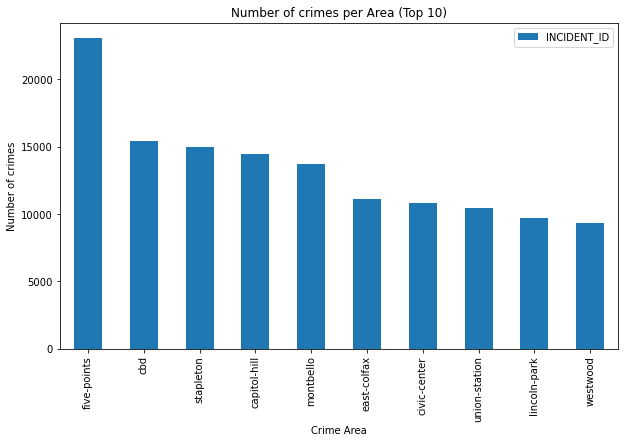

In [67]:
Denvur_crimes_cases=Denvur_crimes.groupby("NEIGHBORHOOD_ID").count().sort_values(['INCIDENT_ID'],ascending=False)
Denvur_crimes_cases[0:10].plot(y='INCIDENT_ID', kind='bar',figsize=(10,6))
plt.xlabel('Crime Area')
plt.ylabel('Number of crimes')
plt.title('Number of crimes per Area (Top 10)')

Text(0.5, 1.0, 'Number of crimes per crime category')

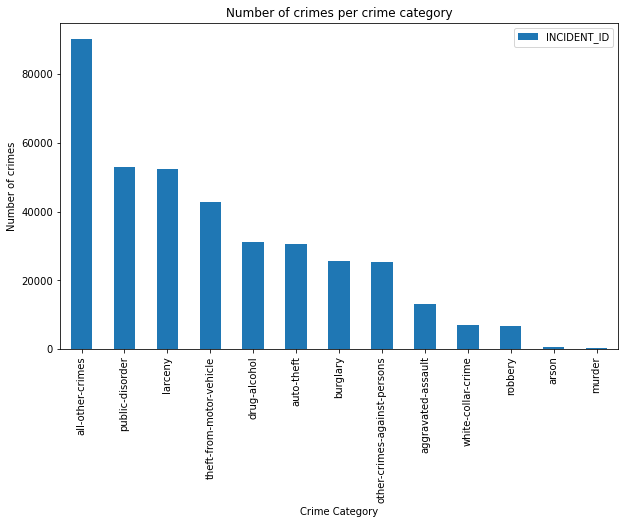

In [37]:
Denvur_crimes_cases=Denvur_crimes.groupby("OFFENSE_CATEGORY_ID").count().sort_values(['INCIDENT_ID'],ascending=False)
Denvur_crimes_cases.plot(y='INCIDENT_ID', kind='bar',figsize=(10,6))
plt.xlabel('Crime Category')
plt.ylabel('Number of crimes')
plt.title('Number of crimes per crime category')

Text(0.5, 1.0, 'Number of crimes per Year')

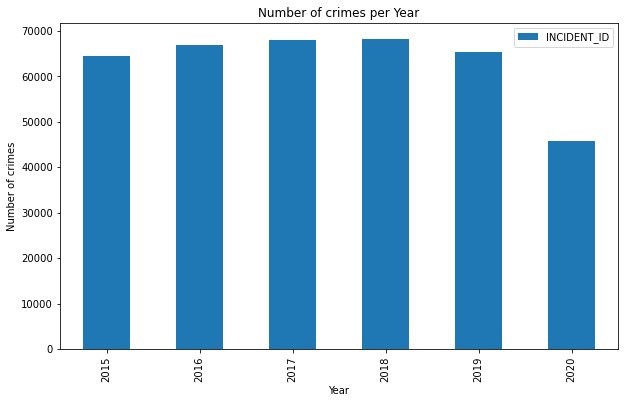

In [38]:
Denvur_crimes_cases=Denvur_crimes.groupby("year").count()
Denvur_crimes_cases.plot(y='INCIDENT_ID', kind='bar',figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.title('Number of crimes per Year')

Text(0.5, 1.0, 'Number of crimes per Month')

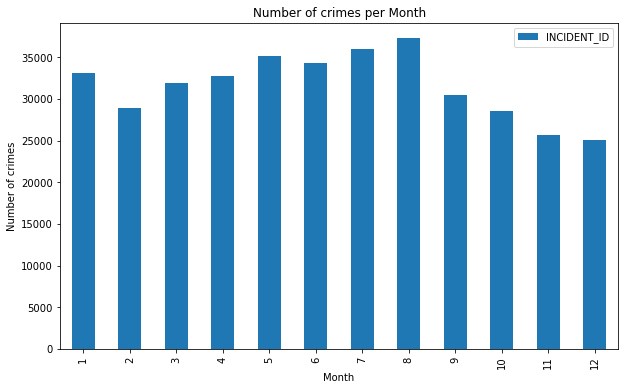

In [39]:
Denvur_crimes_cases=Denvur_crimes.groupby("month").count()
Denvur_crimes_cases.plot(y='INCIDENT_ID', kind='bar',figsize=(10,6))
plt.xlabel('Month')
plt.ylabel('Number of crimes')
plt.title('Number of crimes per Month')

Text(0.5, 1.0, 'Number of crimes per day of the week')

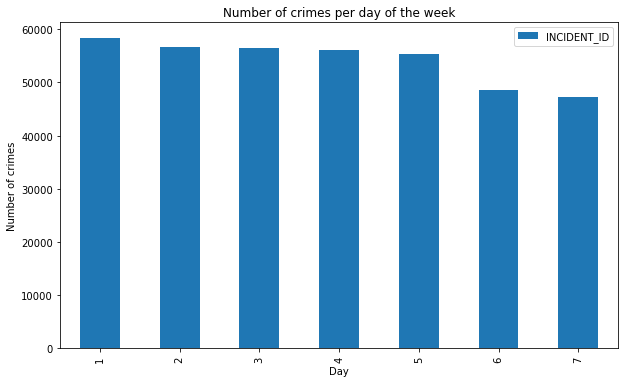

In [40]:
Denvur_crimes_cases=Denvur_crimes.groupby("day").count()
Denvur_crimes_cases.plot(y='INCIDENT_ID', kind='bar',figsize=(10,6))
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.title('Number of crimes per day of the week')

The following maps are included in both the report and presentation. For memory purposes they will not be included in the report

In [573]:
# DN_COORDINATES = (39.7392, -104.9903)
# DN_map = folium.Map(location=DN_COORDINATES, zoom_start=8)
# cluster = MarkerCluster().add_to(DN_map)
# for x in Denvur_crimes.iterrows():
#     folium.Marker(location=[x[1].GEO_LAT, x[1].GEO_LON],icon = None).add_to(cluster)
# DN_map

In [575]:
# DN_heat_map = folium.Map(location=DN_COORDINATES, zoom_start = 12)

# map_data = [[x[1].GEO_LAT, x[1].GEO_LON] for x in Denvur_crimes.iterrows()]
# HeatMap(map_data,
#          min_opacity = 0.5,
#          max_zoom = 18, 
#          radius = 12.5,
#          blur = 25,
#          gradient = None,
#          overlay = True).add_to(DN_heat_map)
# DN_heat_map

## Extracting Venues data

In [18]:
CLIENT_ID = 'CVNOPXGZ1DWKZKZ3E0Z0SHV5GN0BKIOSUSAKPEWG34TOTW1I'
CLIENT_SECRET = '25HXO1W524U5NMHCDKNKUQOGLHEJMLURWOP2ISMHEOFBLE5M'
LIMIT = 50
radius = 1600
VERSION = '20180605'
categories = {
    'Arts & Entertainment': ('4d4b7104d754a06370d81259', 'film', 'blue'),
    'Fitness Center': ('4bf58dd8d48988d175941735', 'tower', 'gray'),
    'Food': ('4d4b7105d754a06374d81259', 'cutlery', 'purple'),
    'Medical Center': ('4bf58dd8d48988d104941735', 'heart', 'red'),
    'Nightlife Spot': ('4d4b7105d754a06376d81259', 'glass', 'darkpuple'),
    'Shop & Service': ('4d4b7105d754a06378d81259', 'shopping-cart', 'cadetblue'),
    }

Function to get nearby venues by neighborhood 

In [19]:

def getNearbyVenues(names, latitudes, longitudes):
    
    columns = ['neighborhood', 'neighborhood_latitude', 'neighborhood_longitude', 'venue_name', 'venue_id', 'venue_rating', 'venue_category', 'venue_category_id', 'venue_address', 'venue_city', 'venue_latitude', 'venue_longitude', 'icon', 'color']

    def getVenueRating(venueId):
        url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(venueId, CLIENT_ID, CLIENT_SECRET, VERSION)
        try:    
            return requests.get(url).json()['response']['venue']['rating']
        except:
            return float('NaN')
    
    venues_list = []
    venues_df = []
    
    for neighborhood, lat, lng in zip(names, latitudes, longitudes):
        for category, category_params in categories.items():
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, category_params[0], radius, LIMIT)
            try:
                results = requests.get(url).json()['response']['venues']
                print('Added: {}, {}'.format(neighborhood, category))
                venue_list = [(neighborhood, lat, lng, v['name'], v['id'], getVenueRating(v['id']), v['categories'][0]['name'], category_params[0], v['location']['formattedAddress'][0], v['location']['formattedAddress'][1], v['location']['lat'], v['location']['lng'], category_params[1], category_params[2]) for v in results]
                venues_df.append(pd.DataFrame([item for item in venue_list], columns=columns))
            except:
                print('Skipped: {}, {}'.format(neighborhood, category))
                venues_df.append(pd.DataFrame(columns=columns))

    venues_df = pd.concat(venues_df, ignore_index=True)
    mask = ~venues_df['venue_id'].duplicated(keep='first')
    return venues_df[mask]

Create dataframe to specifically retrive Denvur city venues

In [22]:
Denvur_data= Denvur_crimes.drop_duplicates(subset = ["NEIGHBORHOOD_ID"])
Denvur_data= Denvur_data[["NEIGHBORHOOD_ID","GEO_LAT","GEO_LON"]]

In [ ]:
Dn_city_venues = getNearbyVenues(names=Denvur_data.NEIGHBORHOOD_ID, latitudes=Denvur_data.GEO_LAT, 
                                 longitudes=Denvur_data.GEO_LON)
Dn_city_venues.to_csv('generated_data/dn_city_venues.csv', index=False)

In [464]:
Dn_city_venues=pd.read_csv('city_venue.csv')

neighborhood                            five-points
neighborhood_latitude                       39.7557
neighborhood_longitude                     -104.987
venue_name                Color's Field Section 138
venue_id                   595e9515178a2a1a94a38319
venue_rating                                    NaN
venue_category                     Baseball Stadium
venue_category_id          4d4b7104d754a06370d81259
venue_address                      Denver, CO 80205
venue_city                            United States
venue_latitude                              39.7557
venue_longitude                            -104.994
icon                                           film
color                                          blue
Name: 7083, dtype: object

### Visualize the venues with  a heat map of the crimes

In [435]:
# map_data = [[row.GEO_LAT, row.GEO_LON] for _, row in Denvur_crimes.iterrows()]

# for _, city_row in Denvur_data.iterrows():
#     df = Dn_city_venues.loc[Dn_city_venues.neighborhood==city_row.NEIGHBORHOOD_ID]
    
#     if df.empty is not True:
        
#         dn_heat_map = folium.Map(location = [city_row.GEO_LAT, city_row.GEO_LON], zoom_start = 14)
        
#         HeatMap(map_data,
#                 min_opacity = 0.5,
#                 max_zoom = 18, 
#                 max_val = 1.0, 
#                 radius = 20,
#                 blur = 30,
#                 gradient = None,
#                 overlay = True).add_to(dn_heat_map);
        
#         folium.Marker(
#                 location=[city_row.GEO_LAT, city_row.GEO_LON],
#                 popup='Neighborhood: {}'.format(city_row.NEIGHBORHOOD_ID),
#                 icon=folium.Icon(color='black')
#             ).add_to(dn_heat_map)
        

#         for _, row in df.iterrows():
#             folium.Marker(
#                 location=[row.venue_latitude, row.venue_longitude],
#                 popup='Venue: {} <br> Category: {}'.format(row.venue_name, row.venue_category),
#                 icon=folium.Icon(icon=row.icon, color=row.color)
#             ).add_to(dn_heat_map)

#         dn_heat_map.save('{}_heat_map_venues.html'.format(city_row.NEIGHBORHOOD_ID.lower().replace('/', '-').replace(' ', '_')))

<ipython-input-435-c9b3da450411>:10: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(map_data,
<ipython-input-435-c9b3da450411>:30: UserWarning: color argument of Icon should be one of: {'red', 'darkblue', 'darkred', 'lightred', 'black', 'green', 'pink', 'darkpurple', 'gray', 'darkgreen', 'lightgreen', 'lightblue', 'white', 'beige', 'orange', 'lightgray', 'blue', 'purple', 'cadetblue'}.
  icon=folium.Icon(icon=row.icon, color=row.color)


### Plot the relationship between the number of venues and crimes by area

Get the number of crimes by nighborhood

In [565]:
Denvur_cases=Denvur_crimes[['NEIGHBORHOOD_ID']].copy()
Denvur_cases['Crime Count']=Denvur_cases.groupby('NEIGHBORHOOD_ID')['NEIGHBORHOOD_ID'].transform('count')
Denvur_cases.drop_duplicates(inplace=True)

Get the number of venues by nighborhood

In [481]:
city_venues=Dn_city_venues[['neighborhood']].copy()
city_venues['Venue Count']=city_venues.groupby('neighborhood')['neighborhood'].transform('count')
city_venues.drop_duplicates(inplace=True)
city_venues.rename(columns={"neighborhood":"NEIGHBORHOOD_ID"}, inplace=True)

Merge the two dataframes

In [482]:
nighborhood_data= pd.merge(Denvur_cases,city_venues,on="NEIGHBORHOOD_ID")
nighborhood_data

,NEIGHBORHOOD_ID,Crime Count,Venue Count
0,stapleton,14978,179
1,union-station,10433,271
2,west-colfax,8864,214
3,montbello,13690,31
4,elyria-swansea,4918,154
...,...,...,...
72,country-club,773,33
73,wellshire,449,20
74,goldsmith,2915,248
75,indian-creek,502,90


Sort values by the number of crimes

In [483]:
nighborhood_data.sort_values(by=['Crime Count'], ascending=False,inplace=True)

Get the are with the max number of venues

In [484]:
nighborhood_data[nighborhood_data["Venue Count"]==nighborhood_data["Venue Count"].max()]

,NEIGHBORHOOD_ID,Crime Count,Venue Count
8,five-points,23034,279


Get the are with the max number of crimes

In [485]:
nighborhood_data[nighborhood_data["Crime Count"]==nighborhood_data["Crime Count"].max()]

,NEIGHBORHOOD_ID,Crime Count,Venue Count
8,five-points,23034,279


Create scatter plot

<AxesSubplot:xlabel='NEIGHBORHOOD_ID', ylabel='Venue Count'>

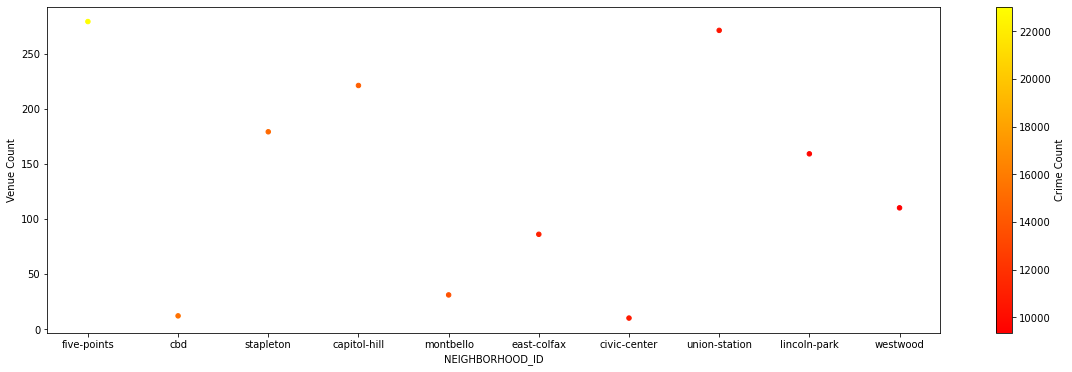

In [486]:
nighborhood_data[0:10].plot.scatter(x='NEIGHBORHOOD_ID',
                      y='Venue Count',
                      c='Crime Count',
                      figsize=(20,6),
                      cmap=cm.autumn,
                      sharex=False)

From the previous chart we can't say that there is a direct correlation between the number of venues and crimes, However the area with the max number of venues in Denver is also the area with the most crimes

In the next part will further explore areas with theft crimes

In [487]:
df=Denvur_crimes[(Denvur_crimes['OFFENSE_CATEGORY_ID'].str.contains('burglary')) & (Denvur_crimes['OFFENSE_TYPE_ID'].str.contains('burglary-business-by-force'))]

In [489]:
Denvur_cases=df[['NEIGHBORHOOD_ID']].copy()
Denvur_cases['Crime Count']=df.groupby('NEIGHBORHOOD_ID')['NEIGHBORHOOD_ID'].transform('count')
Denvur_cases.drop_duplicates(inplace=True)
Denvur_cases

,NEIGHBORHOOD_ID,Crime Count
15,westwood,94
391,city-park-west,59
491,speer,118
548,five-points,265
599,country-club,23
...,...,...
41086,hale,25
45862,kennedy,17
48664,chaffee-park,14
50141,jefferson-park,31


In [490]:
nighborhood_data= pd.merge(Denvur_cases,city_venues,on="NEIGHBORHOOD_ID")
nighborhood_data

,NEIGHBORHOOD_ID,Crime Count,Venue Count
0,westwood,94,110
1,city-park-west,59,33
2,five-points,265,279
3,country-club,23,33
4,overland,194,4
...,...,...,...
72,hale,25,11
73,kennedy,17,188
74,chaffee-park,14,50
75,jefferson-park,31,60


In [446]:
nighborhood_data.sort_values(by=['Crime Count'], ascending=False,inplace=True)

<AxesSubplot:xlabel='NEIGHBORHOOD_ID', ylabel='Venue Count'>

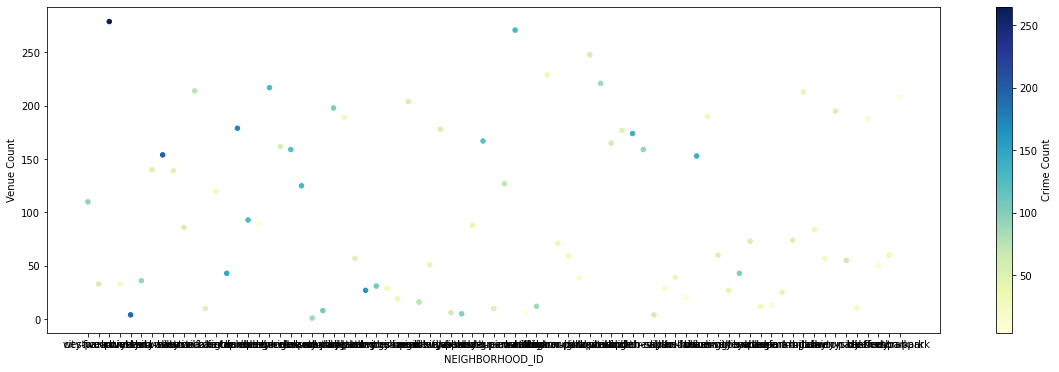

In [491]:
nighborhood_data.plot.scatter(x='NEIGHBORHOOD_ID',
                      y='Venue Count',
                      c='Crime Count',
                      figsize=(20,6),
                      cmap=cm.YlGnBu,
                      sharex=False)

There's a relative relationship between the number of venues and number of Bussinuse Burlgery crimes. However, this relationshib may also be affected by many factors like the amount of scearuity surroanding the area, number of CCTVs and type of venues

## Data Modeling 

In [493]:
Denvur_onehot = pd.get_dummies(Dn_city_venues[['venue_category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Denvur_onehot['Neighborhood'] = Dn_city_venues['neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Denvur_onehot.columns[-1]] + list(Denvur_onehot.columns[:-1])
Denvur_onehot = Denvur_onehot[fixed_columns]

Denvur_onehot

,Neighborhood,ATM,Accessories Store,Acupuncturist,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Animal Shelter,Antique Shop,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,stapleton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,stapleton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,stapleton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,stapleton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,stapleton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7546,central-park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7547,central-park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7548,central-park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7549,central-park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [545]:
Denvur_grouped = Denvur_onehot.groupby('Neighborhood').mean().reset_index()
Denvur_grouped=pd.merge(Denvur_grouped,Denvur_cases, left_on='Neighborhood',right_on='NEIGHBORHOOD_ID')
Denvur_grouped=pd.merge(Denvur_grouped,city_venues, left_on='Neighborhood',right_on='NEIGHBORHOOD_ID')
Denvur_grouped

,Neighborhood,ATM,Accessories Store,Acupuncturist,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Animal Shelter,Antique Shop,...,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,NEIGHBORHOOD_ID_x,Crime Count,NEIGHBORHOOD_ID_y,Venue Count
0,athmar-park,0.005051,0.0,0.000000,0.0,0.0,0.010101,0.000000,0.0,0.015152,...,0.0,0.000000,0.0,0.015152,0.0,0.0,athmar-park,104,athmar-park,198
1,auraria,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.083333,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,auraria,33,auraria,12
2,baker,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.006536,0.0,0.000000,...,0.0,0.000000,0.0,0.019608,0.0,0.0,baker,140,baker,153
3,barnum,0.000000,0.0,0.000000,0.0,0.0,0.016667,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.008333,0.0,0.0,barnum,30,barnum,120
4,barnum-west,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.016949,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,barnum-west,28,barnum-west,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,west-colfax,0.000000,0.0,0.000000,0.0,0.0,0.004673,0.004673,0.0,0.000000,...,0.0,0.000000,0.0,0.009346,0.0,0.0,west-colfax,75,west-colfax,214
73,west-highland,0.000000,0.0,0.006173,0.0,0.0,0.006173,0.012346,0.0,0.000000,...,0.0,0.006173,0.0,0.037037,0.0,0.0,west-highland,54,west-highland,162
74,westwood,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,westwood,94,westwood,110
75,whittier,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,whittier,4,whittier,6


In [546]:
Denvur_grouped=Denvur_grouped.drop(['NEIGHBORHOOD_ID_x','NEIGHBORHOOD_ID_y'], axis=1)

In [547]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [548]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Denvur_grouped['Neighborhood']

for ind in np.arange(Denvur_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Denvur_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,athmar-park,Venue Count,Crime Count,Art Gallery,Convenience Store,Mexican Restaurant,Bar,Gym,General Entertainment,Dive Bar,Medical Center
1,auraria,Crime Count,Venue Count,Cocktail Bar,Pizza Place,Lounge,Market,Beer Garden,Italian Restaurant,Mexican Restaurant,Gift Shop
2,baker,Venue Count,Crime Count,Gym,Gym / Fitness Center,Art Gallery,Bar,Doctor's Office,Coffee Shop,Medical Center,Sandwich Place
3,barnum,Venue Count,Crime Count,Brewery,Medical Center,Food Truck,Mexican Restaurant,Art Gallery,Bakery,Gym / Fitness Center,Gas Station
4,barnum-west,Venue Count,Crime Count,Mexican Restaurant,Automotive Shop,Food,Medical Center,Bowling Alley,Storage Facility,Asian Restaurant,Veterinarian


Train the model

In [549]:
Denvur_grouped_clustering = Denvur_grouped.drop('Neighborhood', 1)
Denvur_grouped_clustering

,ATM,Accessories Store,Acupuncturist,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Animal Shelter,Antique Shop,Aquarium,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Crime Count,Venue Count
0,0.005051,0.0,0.000000,0.0,0.0,0.010101,0.000000,0.0,0.015152,0.0,...,0.020202,0.000000,0.0,0.000000,0.0,0.015152,0.0,0.0,104,198
1,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.083333,0.0,0.000000,0.0,...,0.083333,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,33,12
2,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.006536,0.0,0.000000,0.0,...,0.006536,0.000000,0.0,0.000000,0.0,0.019608,0.0,0.0,140,153
3,0.000000,0.0,0.000000,0.0,0.0,0.016667,0.000000,0.0,0.000000,0.0,...,0.008333,0.000000,0.0,0.000000,0.0,0.008333,0.0,0.0,30,120
4,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.016949,0.0,0.000000,0.0,...,0.016949,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,28,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.000000,0.0,0.000000,0.0,0.0,0.004673,0.004673,0.0,0.000000,0.0,...,0.004673,0.004673,0.0,0.000000,0.0,0.009346,0.0,0.0,75,214
73,0.000000,0.0,0.006173,0.0,0.0,0.006173,0.012346,0.0,0.000000,0.0,...,0.006173,0.000000,0.0,0.006173,0.0,0.037037,0.0,0.0,54,162
74,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.009091,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,94,110
75,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,4,6


In [550]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Denvur_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 3, 1, 2, 1, 2, 2, 1, 0])

In [551]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [552]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 0].shape

(11, 12)

The first cluster contains 4 niubourhoods

In [553]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 1].shape

(21, 12)

The second cluster contains 29 niubourhoods

In [554]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 2].shape

(33, 12)

The Third cluster contains 14 niubourhoods

In [555]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 3].shape

(9, 12)

The Fourth cluster contains 10 niubourhoods

In [556]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 4].shape

(3, 12)

The Fifth cluster contains 20 niubourhoods

<AxesSubplot:ylabel='Neighborhood'>

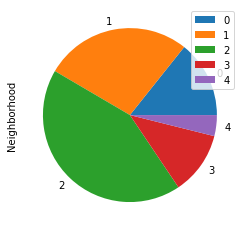

In [557]:
cluster_labels= neighborhoods_venues_sorted.groupby('Cluster Labels').count()
cluster_labels.plot.pie(y='Neighborhood')

<AxesSubplot:xlabel='Cluster Labels'>

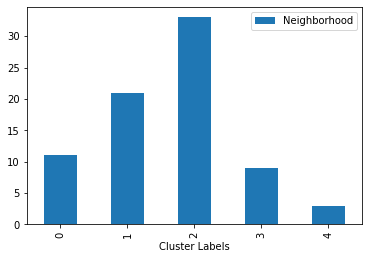

In [558]:
cluster_labels= neighborhoods_venues_sorted.groupby('Cluster Labels').count()
cluster_labels.plot(y='Neighborhood', kind='bar')

Neighborhood in each cluster

In [572]:
cluster = neighborhoods_venues_sorted['Neighborhood'][neighborhoods_venues_sorted['Cluster Labels']==0]
cluster = pd.merge(cluster,nighborhood_data,left_on='Neighborhood', right_on='NEIGHBORHOOD_ID' )
cluster[['Neighborhood','Crime Count','Venue Count']]

,Neighborhood,Crime Count,Venue Count
0,cbd,88,12
1,harvey-park,87,1
2,highland,146,43
3,mar-lee,75,16
4,montbello,107,31
5,overland,194,4
6,ruby-hill,107,8
7,university-hills,93,36
8,valverde,99,5
9,virginia-village,102,43


In [566]:
cluster = neighborhoods_venues_sorted['Neighborhood'][neighborhoods_venues_sorted['Cluster Labels']==1]
cluster = pd.merge(cluster,nighborhood_data,left_on='Neighborhood', right_on='NEIGHBORHOOD_ID' )
cluster[['Neighborhood','Crime Count','Venue Count']]

,Neighborhood,Crime Count,Venue Count
0,athmar-park,104,198
1,barnum,30,120
2,bear-valley,50,140
3,capitol-hill,88,221
4,central-park,6,208
5,city-park,28,189
6,gateway-green-valley-ranch,74,127
7,globeville,93,159
8,goldsmith,58,248
9,kennedy,17,188


In [567]:
cluster = neighborhoods_venues_sorted['Neighborhood'][neighborhoods_venues_sorted['Cluster Labels']==2]
cluster = pd.merge(cluster,nighborhood_data,left_on='Neighborhood', right_on='NEIGHBORHOOD_ID' )
cluster[['Neighborhood','Crime Count','Venue Count']]

,Neighborhood,Crime Count,Venue Count
0,auraria,33,12
1,barnum-west,28,59
2,belcaro,54,73
3,berkeley,48,57
4,chaffee-park,14,50
5,cheesman-park,42,25
6,city-park-west,59,33
7,civic-center,50,10
8,clayton,27,57
9,cole,40,88


In [568]:
cluster = neighborhoods_venues_sorted['Neighborhood'][neighborhoods_venues_sorted['Cluster Labels']==3]
cluster = pd.merge(cluster,nighborhood_data,left_on='Neighborhood', right_on='NEIGHBORHOOD_ID' )
cluster[['Neighborhood','Crime Count','Venue Count']]

,Neighborhood,Crime Count,Venue Count
0,baker,140,153
1,college-view-south-platte,133,125
2,elyria-swansea,199,154
3,hampden,128,93
4,hampden-south,139,174
5,lincoln-park,124,159
6,northeast-park-hill,120,167
7,stapleton,173,179
8,westwood,94,110


In [569]:
cluster = neighborhoods_venues_sorted['Neighborhood'][neighborhoods_venues_sorted['Cluster Labels']==4]
cluster = pd.merge(cluster,nighborhood_data,left_on='Neighborhood', right_on='NEIGHBORHOOD_ID' )
cluster[['Neighborhood','Crime Count','Venue Count']]

,Neighborhood,Crime Count,Venue Count
0,cherry-creek,128,217
1,five-points,265,279
2,union-station,132,271
